In [2]:
import pandas as pd

analytics = pd.read_csv('Deaths Observation Analysis.csv') # read analytics sheet

analytics['Timestamp'] = pd.to_datetime(analytics['Timestamp']) # convert to datetime for sorting

sessions = analytics.groupby('sessionID') # group analytics data by session ID, to collect data by session
levelJumps = [] # levelJumps will hold the number of jumps for each level for each session
levelJumps.append([]) # start with empty arrays for levels 1-3
levelJumps.append([])
levelJumps.append([])
for session_id, session_data in sessions: # loop through each of the grouped sessions...
    # make sure the timestamps within a session are sorted correctly
    sorted_session_data = session_data.sort_values(by='Timestamp')
    jumps = [0,0,0] # initialize counter for number of jump datapoints for the session per-level
    for i, r in sorted_session_data.iterrows(): # iterate through each row in the current session's data
        if r['activity'] == 'Jump - Level1': # increment counter when seeing a jump for each level
            jumps[0] += 1
        if r['activity'] == 'Jump - Level2':
            jumps[1] += 1
        if r['activity'] == 'Jump - Level3':
            jumps[2] += 1
    levelJumps[0].append(jumps[0]) # then add the final jump counter for the session per-level to levelJumps array
    levelJumps[1].append(jumps[1])
    levelJumps[2].append(jumps[2])

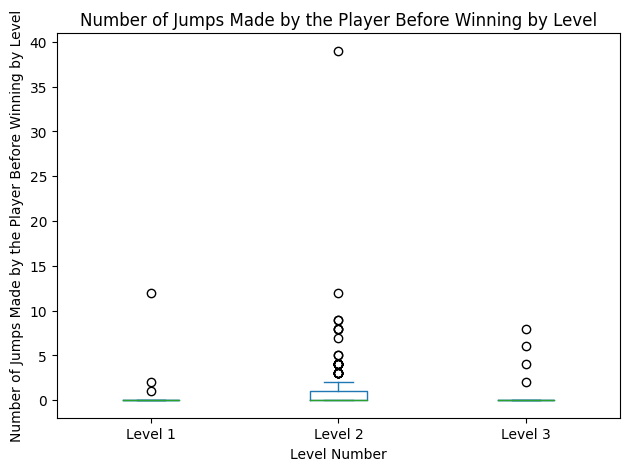

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

dictionarry = { # create a boxplot using each level's data
    'Level 1': levelJumps[0],
    'Level 2': levelJumps[1],
    'Level 3': levelJumps[2]

}
df = pd.DataFrame(dictionarry)

df.plot(kind="box", title="Number of Jumps Made by the Player Before Winning by Level")
plt.xlabel("Level Number")
plt.ylabel('Number of Jumps Made by the Player Before Winning by Level')
plt.tight_layout()
plt.show()

In [27]:
levelDeaths = [] # levelDeaths will hold the number of deaths for each level for each session
levelDeaths.append([]) # start with empty arrays for levels 1-3
levelDeaths.append([])
levelDeaths.append([])
for session_id, session_data in sessions: # loop through each of the grouped sessions...
    # make sure the timestamps within a session are sorted correctly
    sorted_session_data = session_data.sort_values(by='Timestamp')
    deaths = [0,0,0] # initialize counter for number of death datapoints for the session per-level
    for i, r in sorted_session_data.iterrows(): # iterate through each row in the current session's data
        if r['activity'] == 'Died (Spikes) - Level1' or r['activity'] == 'Died (Enemy) - Level1': # increment counter when seeing a death for each level
            deaths[0] += 1
        if r['activity'] == 'Died (Spikes) - Level2' or r['activity'] == 'Died (Enemy) - Level2':
            deaths[1] += 1
        if r['activity'] == 'Died (Spikes) - Level2' or r['activity'] == 'Died (Enemy) - Level2':
            deaths[2] += 1
    levelDeaths[0].append(deaths[0]) # then add the final jump counter for the session per-level to levelJumps array
    levelDeaths[1].append(deaths[1])
    levelDeaths[2].append(deaths[2])

In [26]:
levelCollisions = [] # levelCollisions will hold the number of wall hits for each level for each session
levelCollisions.append([]) # start with empty arrays for levels 1-3
levelCollisions.append([])
levelCollisions.append([])
for session_id, session_data in sessions: # loop through each of the grouped sessions...
    # make sure the timestamps within a session are sorted correctly
    sorted_session_data = session_data.sort_values(by='Timestamp')
    coll = [0,0,0] # initialize counter for number of wall hits datapoints for the session per-level
    for i, r in sorted_session_data.iterrows(): # iterate through each row in the current session's data
        if r['activity'] == 'Hit Wall - Level1': # increment counter when seeing a wall hit for each level
            coll[0] += 1
        if r['activity'] == 'Hit Wall - Level2':
            coll[1] += 1
        if r['activity'] == 'Hit Wall - Level3':
            coll[2] += 1
    levelCollisions[0].append(coll[0]) # then add the final hit counter for the session per-level to levelCollisions array
    levelCollisions[1].append(coll[1])
    levelCollisions[2].append(coll[2])

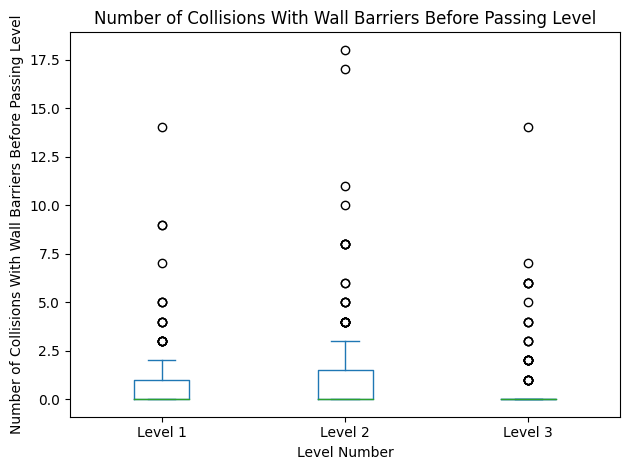

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

dictionarry = {
    'Level 1': levelCollisions[0],
    'Level 2': levelCollisions[1],
    'Level 3': levelCollisions[2]

}
df = pd.DataFrame(dictionarry)

df.plot(kind="box", title="Number of Collisions With Wall Barriers Before Passing Level")
plt.xlabel("Level Number")
plt.ylabel('Number of Collisions With Wall Barriers Before Passing Level')
plt.tight_layout()
plt.show()

In [25]:
levelPercentage = [] # levelPercentage will hold the percentage in spotlight for each level for each session
levelPercentage.append([]) # start with empty arrays for levels 1-3
levelPercentage.append([])
levelPercentage.append([])
for session_id, session_data in sessions: # loop through each of the grouped sessions...
    # make sure the timestamps within a session are sorted correctly
    sorted_session_data = session_data.sort_values(by='Timestamp')
    inSpotlight = [0,0,0] # initialize counter for amount of time in spotlight per-level
    totalTime = [0,0,0] # counter for amount of time per-level total
    percent = [] # initialize array for percentage by level for this session
    # intiailize the 'last time' to be the very first timestamp of the session at first...
    lastTime = [sorted_session_data.iloc[0]['Timestamp'], sorted_session_data.iloc[0]['Timestamp'], sorted_session_data.iloc[0]['Timestamp']]
    for i, r in sorted_session_data.iterrows(): # iterate through each row in the current session's data
        if r['activity'] == 'Out of Spotlight - Menu': # if out of spotlight menu, re-set lastTime for each level to be current time...
            lastTime = [r['Timestamp'], r['Timestamp'], r['Timestamp']]
        elif r['activity'] == 'Win - Level 1': # if win, update last time for the level to be that time
            lastTime[0] = r['Timestamp']
        elif r['activity'] == 'Win - Level 2':
            lastTime[1] = r['Timestamp']
        elif r['activity'] == 'Win - Level 3':
            lastTime[2] = r['Timestamp']
        elif r['activity'] == 'In Spotlight - Level1': # if in spotlight for that level, add time elapsed since lastTime to totalTime, update lastTIme
            totalTime[0] += (r['Timestamp'] - lastTime[0]).total_seconds()
            lastTime[0] = r['Timestamp']
        elif r['activity'] == 'In Spotlight - Level2':
            totalTime[1] += (r['Timestamp'] - lastTime[1]).total_seconds()
            lastTime[1] = r['Timestamp']
        elif r['activity'] == 'In Spotlight - Level3':
            totalTime[2] += (r['Timestamp'] - lastTime[2]).total_seconds()
            lastTime[2] = r['Timestamp']
        elif r['activity'] == 'Out of Spotlight - Level1': # if out of spotlight for that level, add time elapsed since lastTime to totalTime and to time inSpotlight, update lastTime
            totalTime[0] += (r['Timestamp'] - lastTime[0]).total_seconds()
            inSpotlight[0] += (r['Timestamp'] - lastTime[0]).total_seconds()
            lastTime[0] = r['Timestamp']
        elif r['activity'] == 'Out of Spotlight - Level2':
            totalTime[1] += (r['Timestamp'] - lastTime[1]).total_seconds()
            inSpotlight[1] += (r['Timestamp'] - lastTime[1]).total_seconds()
            lastTime[1] = r['Timestamp']
        elif r['activity'] == 'Out of Spotlight - Level3':
            totalTime[2] += (r['Timestamp'] - lastTime[2]).total_seconds()
            inSpotlight[2] += (r['Timestamp'] - lastTime[2]).total_seconds()
            lastTime[2] = r['Timestamp']
    if totalTime[0] != 0 and totalTime[1] != 0 and totalTime[2] != 0: # if there was some time found for each level...
        percent.append((inSpotlight[0] / totalTime[0]) * 100) # append the percentage of time by-level
        percent.append((inSpotlight[1] / totalTime[1]) * 100)
        percent.append((inSpotlight[2] / totalTime[2]) * 100)
        levelPercentage[0].append(percent[0]) # then add it to levelPercentage array
        levelPercentage[1].append(percent[1])
        levelPercentage[2].append(percent[2])


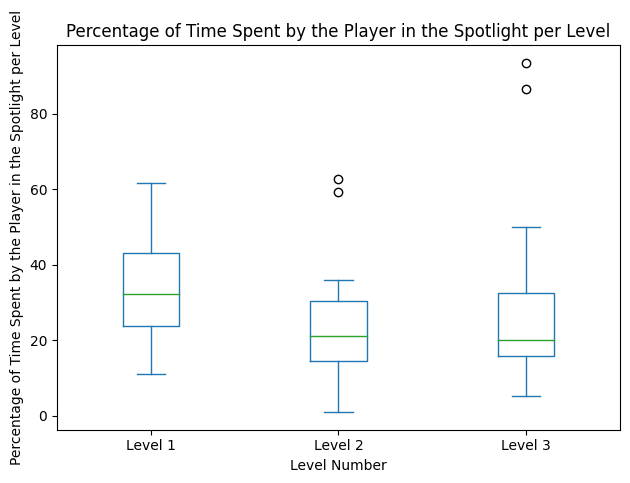

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

dictionarry = {
    'Level 1': levelPercentage[0],
    'Level 2': levelPercentage[1],
    'Level 3': levelPercentage[2]

}
df = pd.DataFrame(dictionarry)

df.plot(kind="box", title="Percentage of Time Spent by the Player in the Spotlight per Level")
plt.xlabel("Level Number")
plt.ylabel('Percentage of Time Spent by the Player in the Spotlight per Level')
plt.tight_layout()
plt.show()

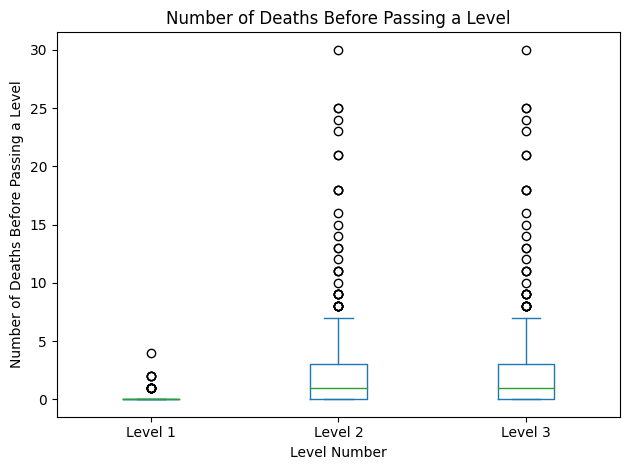

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

dictionarry = {
    'Level 1': levelDeaths[0], # use levelDeaths data parsed above for our dataset
    'Level 2': levelDeaths[1],
    'Level 3': levelDeaths[2]

}
df = pd.DataFrame(dictionarry)

df.plot(kind="box", title="Number of Deaths Before Passing a Level")
plt.xlabel("Level Number")
plt.ylabel('Number of Deaths Before Passing a Level')
plt.tight_layout()
plt.show()